In [90]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pickle
import timeit

# Sections of the report 

-	Introduction
-	Methods
    -	Cleaning the data and creating new input features
    - Analysing and visualising the data
    - Preparing the inputs and choosing suitable features
    - Selecting and training a model
-	Evaluation

-	Conclusion

## 1. Introduction

The telecommunications sector has become one of the main industries in developed countries. The technical progress and the increasing number of operators globally have made the industry competititive. Companies are working hard to survive in this competitive market depending on multiple strategies.

There are often three main strategies for generating more revenue within a business: 
1) Acquiring new customers
2) Upselling existing customers 
3) Increase the retention period of customers

However, comparing these strategies taking the value of return on investment (RoI) of each into account has shown that the third strategy is the most profitable strategy. 
The reason being is that retaining an existing customer costs much lower than acquiring a new one, in addition to being considered much easier than the upselling strategy. 
To apply the third strategy, we need to decrease the potential of customer churn by putting systems in place to do so. Hence why exploring machine learning techniques for predicting customer churn can provide huge financial benefits to companies. 

## 2. Method

### 2.1 Loading and cleaning the data set

In [2]:
# Load the datasets
train = pd.read_csv('proposal_docs/dataset/train.csv', index_col= False)
test = pd.read_csv('proposal_docs/dataset/test.csv', index_col= False)



### Cleaning the dataset 

a) **Check for Null-values and inconsistent data types:** Upon looking at that dataset, we can see that each column has an equal amount of non-null values, indicating that there are **no instances** of missing data. 

However, the datatypes in the datasets are of type objet, int64, float64 indicating varying data types and a mixture between categorical and numerical variables

In [3]:
# Check for Null-values
print(train.info(null_counts=True))
print(test.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

C:\Users\bkhalidson\AppData\Local\Temp\ipykernel_21056\148985564.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(train.info(null_counts=True))
C:\Users\bkhalidson\AppData\Local\Temp\ipykernel_21056\148985564.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(test.info(null_counts=True))


In [4]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


b) **Check for duplicate values**: No duplicate values were found

In [6]:
datasets = [train, test]

for data in datasets: 
    duplicate_rows = data[data.duplicated()]
    print(len(duplicate_rows))

0
0


### 2.1.2 Create new input features
- Created additional features `total_minutes`, `total_calls`  and `total_charges` to obsverve correlations and and see if that affects the model as well
- One-hot encoded the categorical features to in order to create a correlation matrix of all features
- label encoded the target variables 

In [7]:
def add_total_minutes_calls_charge(dataset):
    """
    Function for totally the minutes, calls and charges features
    :dataset: churn X_train or X_test dataset
    """
    dataset['total_minutes'] = dataset['total_day_minutes']  + dataset['total_eve_minutes'] + dataset['total_night_minutes']+ dataset['total_intl_minutes']
    dataset['total_calls'] = dataset['total_day_calls'] + dataset['total_eve_calls'] + dataset['total_night_calls'] + dataset['total_intl_calls']
    dataset['total_charge'] = dataset['total_day_charge'] + dataset['total_eve_charge'] + dataset['total_night_charge'] + dataset['total_intl_charge']
    return dataset

train = add_total_minutes_calls_charge(train)
test  = add_total_minutes_calls_charge(test)

In [8]:
# Convert the Y_train to 0 and 1 

le = LabelEncoder()
train['churn'] = le.fit_transform(train['churn'])

In [9]:
# Convert the categorical variables to 1 hot encoding
cols = train.columns
feature_cols = list(train.columns)
feature_cols.remove('churn')

# Get the numerical and categorical columns
num_cols = train._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

#one hot encode the testing and training set
train_one_hot = pd.get_dummies(data = train, columns = cat_cols)
test_one_hot = pd.get_dummies(data = test, columns = cat_cols)

# Get feature cols
feature_cols = [x for x in train_one_hot.columns if x != 'churn' ]


### 2.1.3 Create a validation set

Despite there being a already a test set in place, a preliminary validation set was created, to evaluate the performance of the model and to see how well the model could
generalise on unseen data. The training data was split with an 90/10 split in stratified fashion.


In [10]:
# create X and y datasets for machine learning purposes
X_train, y_train, X_test = train_one_hot[feature_cols], train['churn'], test_one_hot[feature_cols]

# Split the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=27)

# Resets the indexes
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)


### 2.2 Analysing and Visualising the dataset

#### 2.2.1 Visualising the class distribution


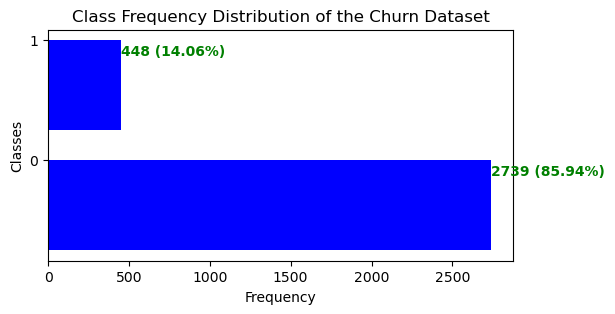

In [11]:
class_value_counts = y_train.value_counts()
classes = np.array(class_value_counts.keys())
class_freq = class_value_counts.values
title = 'Churn'

def get_pct(array, value):
    """
    Gets the percentage of a value in proportion to the sum of an array
    return: pct_string
    """
    pct = value/array.sum()
    pct_string =  " ({:.2%})".format(pct)
    return pct_string
#
def plot_class_dist(data,classes, title):
    """
    Plots a 2-D plot, showing the relationship between classes and frequency
    Plots the images seen in Figure 2 of the report. 
    """
    fig, ax = plt.subplots(figsize=(6, 3))    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(data))  # the x locations for the groups
    ax.barh(ind, data, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(classes, minor=False)
    plt.title("Class Frequency Distribution of the " + title +  " Dataset")
    plt.xlabel('Frequency')
    plt.ylabel('Classes')
    for i, v in enumerate(data):
        ax.text(v + 3, i + .25, str(v) + get_pct(data,v), color='green', fontweight='bold')
    plt.show()
    
plot_class_dist(class_freq, classes, title)

It is evident that the churn dataset is highly imbalanced, with 85% of the dataset not churned while a decent 14% of the dataset being churned. 

#### 2.2.2 Visualising the distributions of the numerical features

Most of the features tend to form a normal distribution, so aren't majorly right skewed or left skewed. However, number_service_calls, total international calls, number_vmail_messages are more right skewed than others

array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>,
        <AxesSubplot:title={'center':'total_day_charge'}>,
        <AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_eve_charge'}>,
        <AxesSubplot:title={'center':'total_night_minutes'}>],
       [<AxesSubplot:title={'center':'total_night_calls'}>,
        <AxesSubplot:title={'center':'total_night_charge'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>,
        <AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'total_intl_charge'}>,
        <AxesSubplot:title={'center':'number_customer_service_calls'}>,
        <AxesSubplot:title={'center':'total_minutes'}>,
        <AxesSubplot:title={'cent

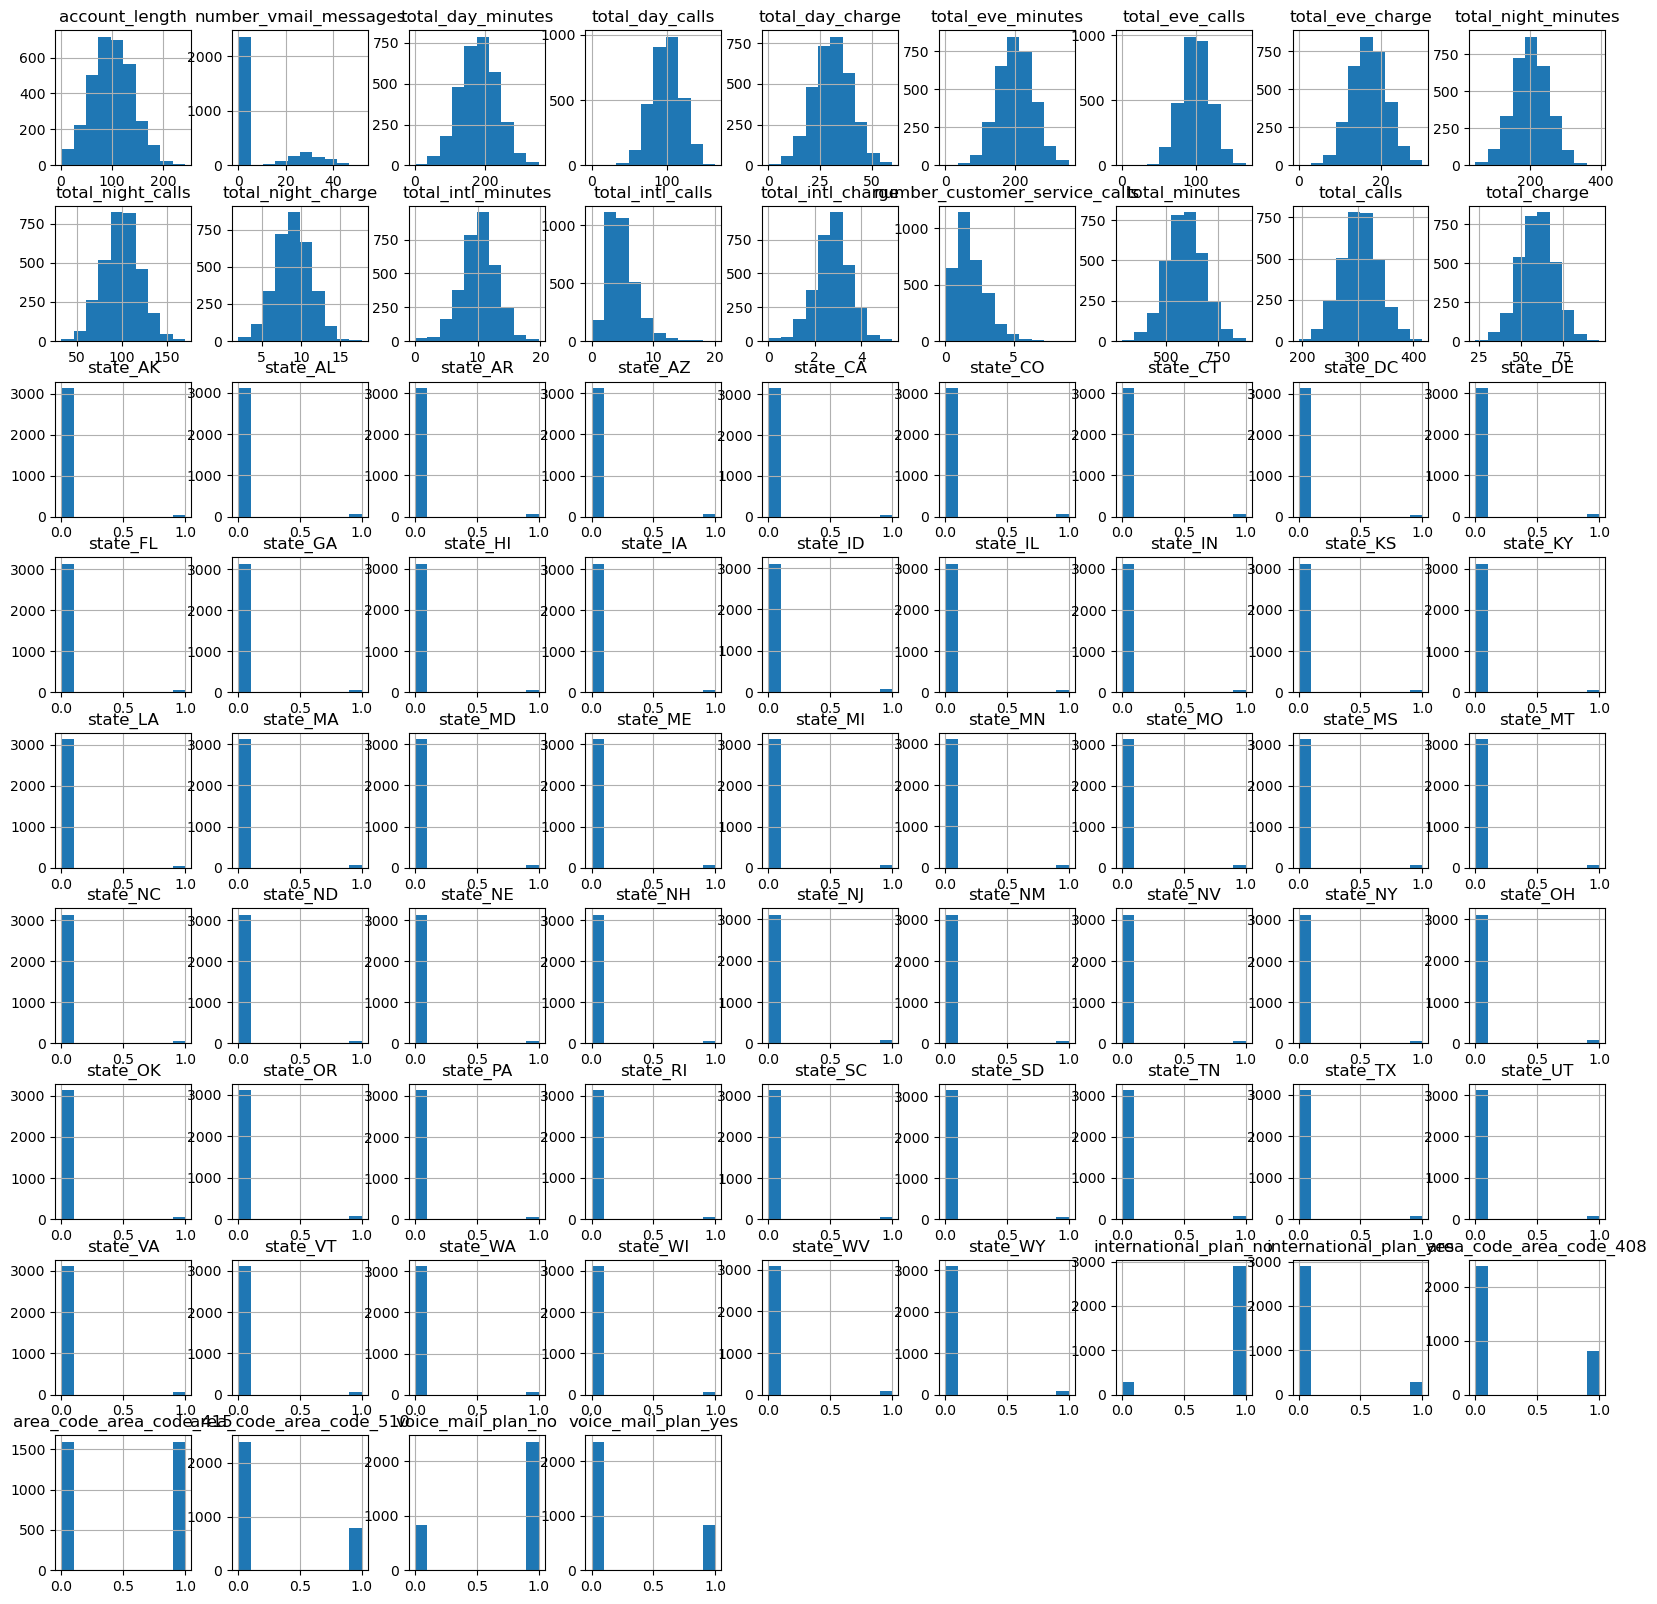

In [12]:
X_train.hist(figsize = (20,20))

#### 2.2.3 Correlation matrix 



In [13]:
corr = train_one_hot.corr()

top_features_corr = corr['churn'].sort_values(ascending = False).head(10)
top_features = top_features_corr.index.values
top_features_corr

churn                            1.000000
international_plan_yes           0.259053
total_charge                     0.237792
number_customer_service_calls    0.221220
total_day_minutes                0.215272
total_day_charge                 0.215263
total_minutes                    0.203669
voice_mail_plan_no               0.114643
total_eve_minutes                0.078855
total_eve_charge                 0.078852
Name: churn, dtype: float64

In [14]:
bot_features_corr = corr['churn'].sort_values(ascending = True).head(10)
bot_features = list(bot_features_corr.index.values)
bot_features.append('churn')
bot_features_corr

international_plan_no   -0.259053
voice_mail_plan_yes     -0.114643
number_vmail_messages   -0.100347
state_VA                -0.040493
state_HI                -0.034674
total_intl_calls        -0.034334
state_RI                -0.029826
state_WI                -0.028649
state_NE                -0.027455
state_AK                -0.026074
Name: churn, dtype: float64

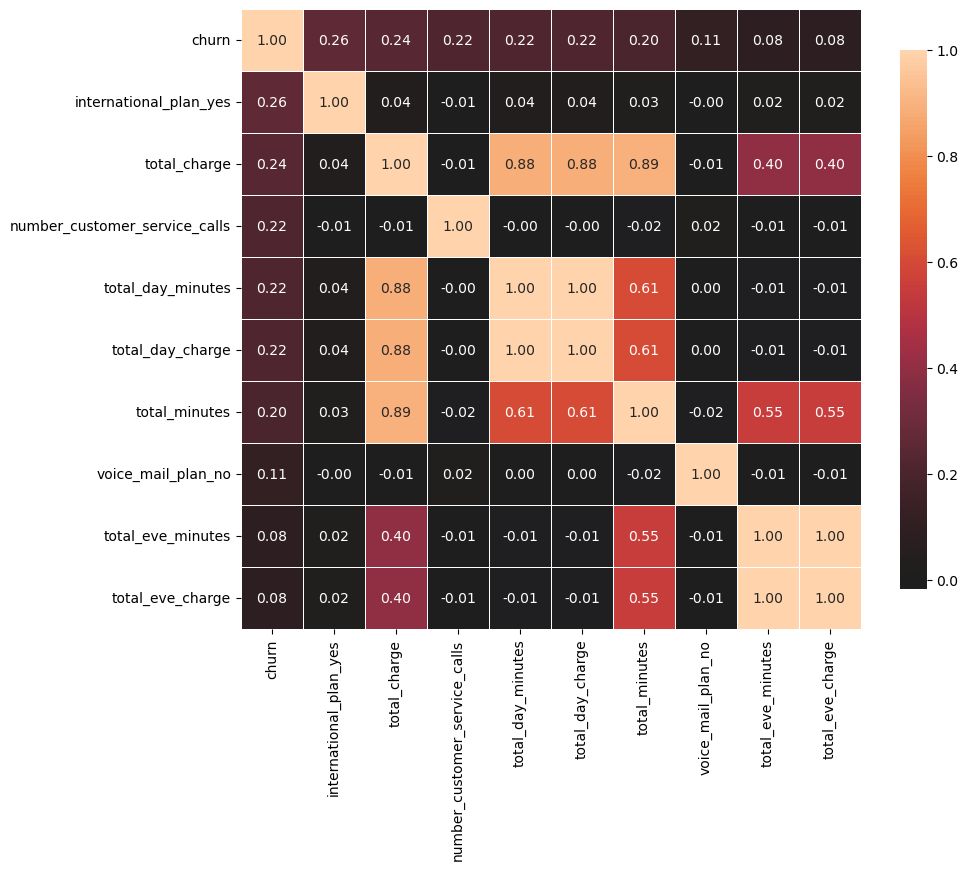

In [15]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(train_one_hot[top_features])


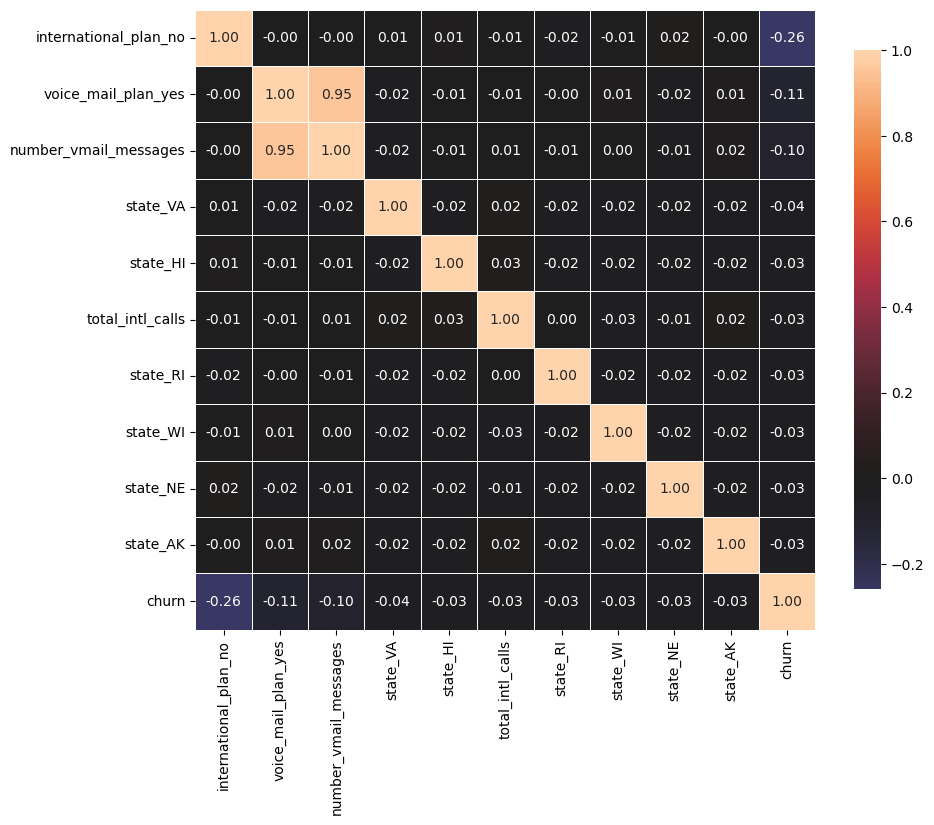

In [16]:
correlation_heatmap(train_one_hot[bot_features])

#### 2.2.3 Plots vs churn

<AxesSubplot:xlabel='international_plan', ylabel='count'>

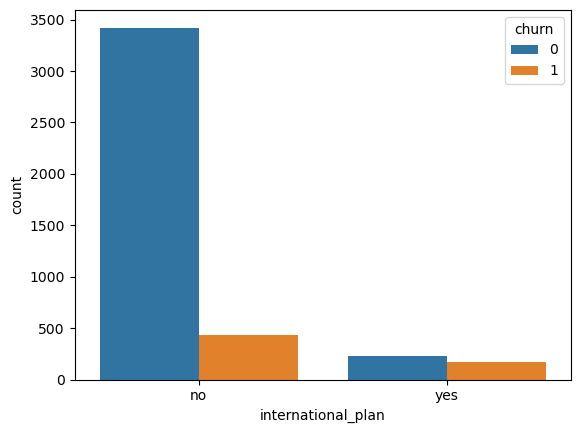

In [17]:
sns.countplot(data=train, x="international_plan", hue="churn")


<AxesSubplot:xlabel='churn', ylabel='count'>

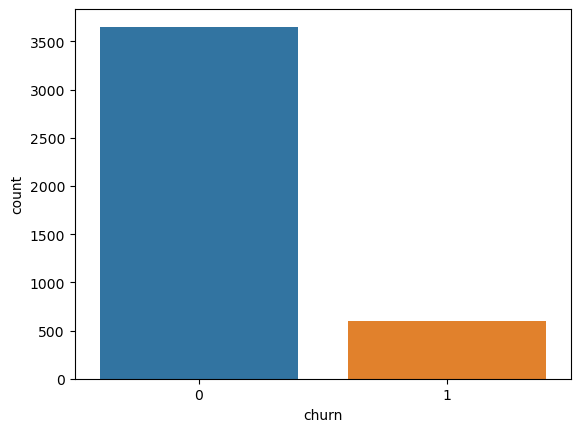

In [18]:
sns.countplot(x=train["churn"])

<AxesSubplot:xlabel='total_charge', ylabel='Count'>

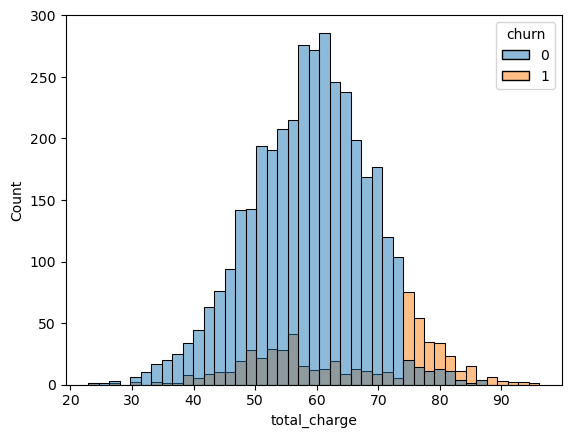

In [19]:
sns.histplot(data=train, x="total_charge", hue="churn")

<AxesSubplot:xlabel='total_minutes', ylabel='Count'>

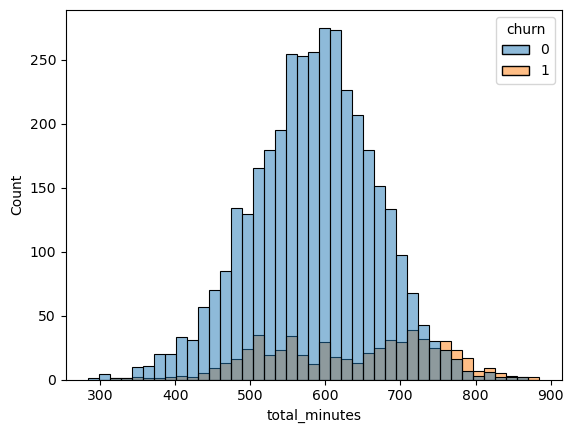

In [20]:
sns.histplot(data=train, x="total_minutes", hue="churn")


### 2.2.4 Plot the scatterplots - maybe consider plotting a pair plot as well

<AxesSubplot:xlabel='total_charge', ylabel='total_day_minutes'>

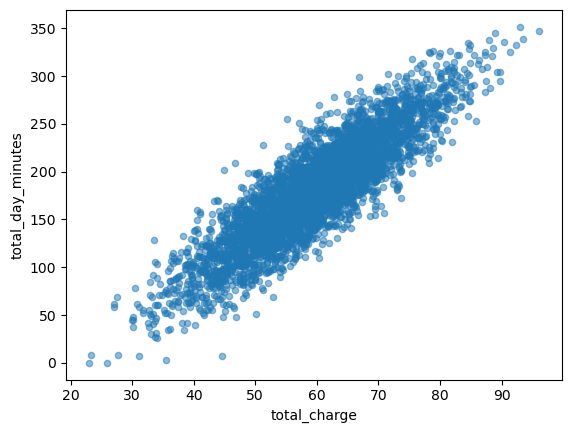

In [21]:
train.plot(kind='scatter', x='total_charge', y='total_day_minutes', alpha=0.5)


## 2.3 Preparing the inputs and choosing suitable features 

In order to pick the best features, i'll create a few datasets with subsets of features and then train a model using 5 fold cross validation to find 
the best dataset to use for hyperparameter tuning.

These are the datasets that will be created: 

- Full dataset
- Top 10 features that correlated with churn
- Recursive feature elimination (RFE)



In [93]:
voters = [('lgbm', LGBMClassifier(verbosity = -1, num_threads = 8)),
          ('rf', RandomForestClassifier()),
          ('xgb', XGBClassifier(verbosity = 0)),
          ('cat', CatBoostClassifier(verbose=True))]
        

models = {'logreg': LogisticRegression(),
          'lgbm': LGBMClassifier(verbosity = -1, num_threads = 8), 
          'xgb': XGBClassifier(verbosity = 0), 
          'rf': RandomForestClassifier(n_jobs = -1),
          'cat': CatBoostClassifier(verbose=True),
          'vc:': VotingClassifier(estimators=voters, voting='soft')}


In [ ]:
# catboost, xgboost, logistic regression, lgbm, mlp classifier, random forest

def evaluate_rfe(RFEClassifier, X_train, y_train): 
    """
   # Evaluates the recursive feature elimination performance for a given model using the LGBM classifier
   # :returns: cross_validation scores
    """
    # create pipeline
    rfe = RFECV(estimator=RFEClassifier)
    model = LGBMClassifier()
    pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('feature_selection',rfe),('model',model)])
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return n_scores

scores, names = list(), list()
eval_rfe_results = {}

for model in models: 
    print(model)
    score = evaluate_rfe(models[model], X_train, y_train)
    scores.append(score)
    names.append(model)
    eval_rfe_results [model] = score
    print('>%s %.3f (%.3f)' % (model, mean(score), std(score)))

results = pd.DataFrame(eval_rfe_results)
results.to_csv('results/eval_rfe_results.csv', index=False, header=True)


In [78]:
def plot_box_plot(X, labels, xlabel, ylabel, title, filename, figsize, t):
    """
    Plots a boxplot of values while annotating the mean and standard deviation
    :X: The input data
    :labels: column labels of the input data
    :xlabel: x axis label
    :ylabel: y axis label
    :filename: Name of the figure file
    :figsize: size of the boxplot
    :t: vector of fit times
    """
    
    # Plot boxpot
    fig, ax = plt.subplots(figsize=figsize)
    bp = plt.boxplot(X, labels=labels, showmeans=True) 
    
    # Annotate the boxplot with mean and std
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    for i, line in enumerate(bp['medians']):
        x, y = line.get_xydata()[1]
        text = ' μ={:.3f}\n σ={:.3f}\n t={:.2f}'.format(mean[i], std[i],t[i])
        ax.annotate(text, xy=(x, y))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

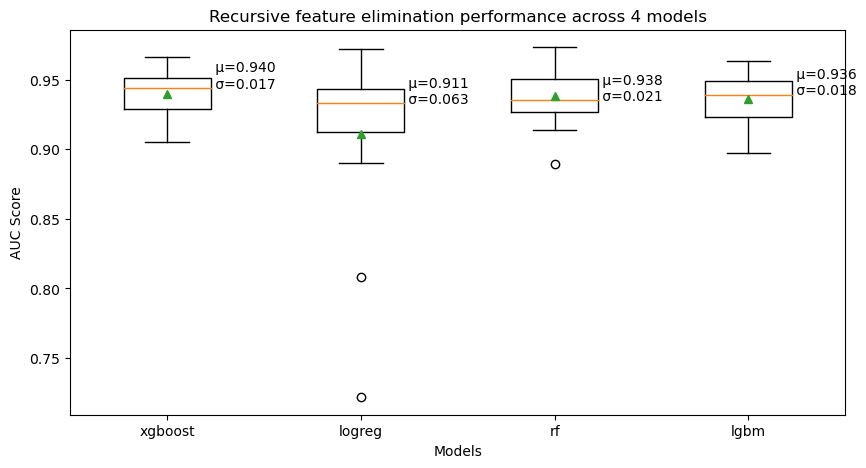

In [44]:
results_df = pd.read_csv('results/eval_rfe_results.csv')

plot_box_plot(X=results_df.values,  
              labels=results_df.columns, 
              xlabel = 'Models', 
              ylabel = 'AUC Score',
              title = 'Recursive feature elimination performance across 4 models',
              filename = 'images/eval_rfe_results.png',
              figsize = (10,5))

In [ ]:
def rfe (X_train, y_train, classifier):
    """
    Implements recursive feature elimination with 5 fold cross validation
    :X_train: 
    :y_train: 
    :return: transformed dataframe (X_train_rfe), features selected
    """
    estimator = classifier
    selector = RFECV(estimator, step=1, cv=5, scoring = 'roc_auc')
    selector = selector.fit(X_train, y_train)
    X_train_rfe = selector.transform(X_train)
    features_selected = {}
    
    for i in range(len(selector.support_)):
        if selector.support_[i] == True:
            features_selected[i] = selector.feature_names_in_[i]
        
    return X_train_rfe, features_selected

X_train_rfe, features_selected = rfe(X_train, y_train, models['xgb'])

In [53]:
# remove churn from top features array as it is the target variables
churn_index = 0
top_features = np.delete(top_features, churn_index)

X_train_list = {'full_dataset': X_train, 
                'top_10_features': X_train[top_features], 
                'RFE' : X_train_rfe}

In [68]:
with open('X_train_list.pickle', 'wb') as f:
    pickle.dump(X_train_list, f)

In [69]:
"""
with open('../../datasets/churn/X_train_datasets.pickle', 'rb') as f:
    X_train_datasets = pickle.load(f)
"""

"\nwith open('../../datasets/churn/X_train_datasets.pickle', 'rb') as f:\n    X_train_datasets = pickle.load(f)\n"

## 2.4 Train the models


### 2.4.1 Find top peforming dataset

Here we evaluate the top peforming 

In [70]:
def cross_validate(model, X_train, y_train): 
    """
    Evaluates trainiing performance with repeated stratified cross validation of a given dataset
    :returns: cross_validation scores
    """
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return n_scores

In [61]:
scores, names = list(), list()
eval_dataset_results = {}

for X_train in X_train_list: 
    print(X_train)
    score = evaluate_dataset(models['lgbm'], X_train_list[X_train], y_train)
    scores.append(score)
    names.append(X_train)
    eval_dataset_results [X_train] = score
    print('>%s %.3f (%.3f)' % (X_train, score.mean(), score.std()))

results = pd.DataFrame(eval_dataset_results)
results.to_csv('results/eval_dataset_results.csv', index=False, header=True)

full_dataset
>full_dataset 0.935 (0.019)
top_10_features
>top_10_features 0.850 (0.030)
RFE
>RFE 0.938 (0.022)


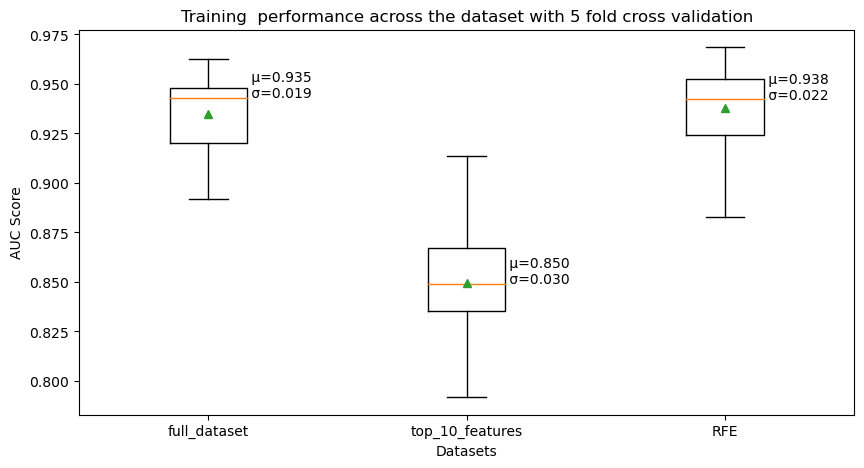

In [62]:
results_df = pd.read_csv('results/eval_dataset_results.csv')

plot_box_plot(X=results_df.values,  
              labels=results_df.columns, 
              xlabel = 'Datasets', 
              ylabel = 'AUC Score',
              title = 'Training  performance across the dataset with 5 fold cross validation',
              filename = 'images/eval_dataset_results.png',
              figsize = (10,5))

### 2.4.2 Find top peforming models

In this section we compare the performance of the 5 models with their default parameters with 10 fold cross validation on the Rfe dataset: 
- Logistic Regression
- Catboost 
- XgBoost 
- random forest
- Ligthgbm 

In [86]:

def evaluate_models(models, X_train,  csv_name):
    """
    Model list setup for evaluation
    :X_train: type of dataset
    :models: Dictionary of models
    :filenme: filename of the results
    """
    
    # Set up data storage
    scores, names, times  = list(), list(), list()
    eval_dataset_results = {}

    for model in models: 
        # Run the evaluation
        start = timeit.default_timer()
        print(f'Evaluation has started on {model}')
        score = cross_validate(models[model], X_train, y_train)
        
        # store values
        scores.append(score)
        names.append(X_train)
        eval_dataset_results[model] = score
        end = timeit.default_timer()
        t = end - start
        times.append(t)

    # Store the final results
    results = pd.DataFrame(eval_dataset_results)
    results.to_csv(csv_name, index=False, header=True)
    
    return results, times
    
    


In [94]:
results, times = evaluate_models(models=models, 
                                       X_train = X_train_list['RFE'],  
                                       csv_name = 'results/eval_model_results.csv')

Evaluation has started on logreg
Evaluation has started on lgbm
Evaluation has started on xgb
Evaluation has started on rf
Evaluation has started on cat
Evaluation has started on vc:


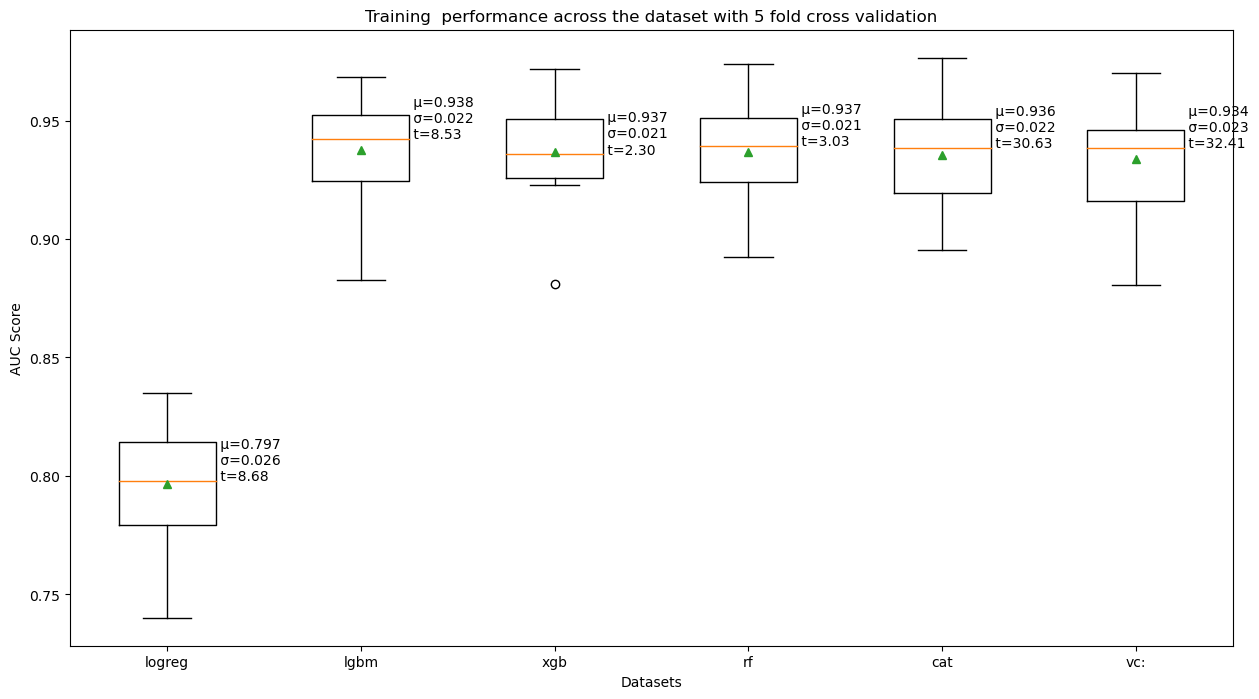

In [95]:
plot_box_plot(X=results.values,  
              labels=results.columns, 
              xlabel = 'Datasets', 
              ylabel = 'AUC Score',
              title = 'Training  performance across the dataset with 5 fold cross validation',
              filename = 'images/eval_dataset_results.png',
              figsize = (15,8),
              t=times)

### 2.4.3 Hyperparameter tuning of top models

### 3. Evaluate on validation set and submit to kaggle

### 4. Deploy model to sagemaker endpoint